# Stock Market Predict

In [13]:
## IMPORTS AND SETUP
import pandas_datareader as web
import os, math, numpy as np, pandas as pd, matplotlib.pyplot as plt, datetime, pandas,sys
from pathlib import Path
addPath = Path(r'c:\Users\jmarulan\OneDrive - Intel Corporation\Documents\Code\customPythonPkgs')
if f'{addPath}' not in sys.path: sys.path.append(f'{addPath}')
import stockModels
os.environ['http_proxy'] = ''#'http://proxy.fm.intel.com:911'
os.environ['https_proxy'] = ''#'http://proxy.fm.intel.com:911'
plt.style.use('fivethirtyeight')


## Extrapolate Data into The FUTURE from Sequence Model

In [15]:
## Inputs
stocks = ['TSLA','NVDA','INTC','ZNGA','DIS','PINS']; 
stocks = ['CRWD']
end = str(datetime.datetime.now()).split()[0]; start = str(datetime.datetime.now() - datetime.timedelta(days=5*365)).split()[0]; models = {}; dfs = {}
for stock in stocks:
    dfs[stock] = web.DataReader(stock, data_source='yahoo',start=start,end=end)
    data = dfs[stock].filter(["Close"]); groups = 14; farBack = 60
    models[stock] = stockModels.sequence_model(data.values, groups, farBack)
    models[stock].trainme()
    models[stock].predict()

25/25 [==============================] - 3s 3ms/step - loss: 0.0865


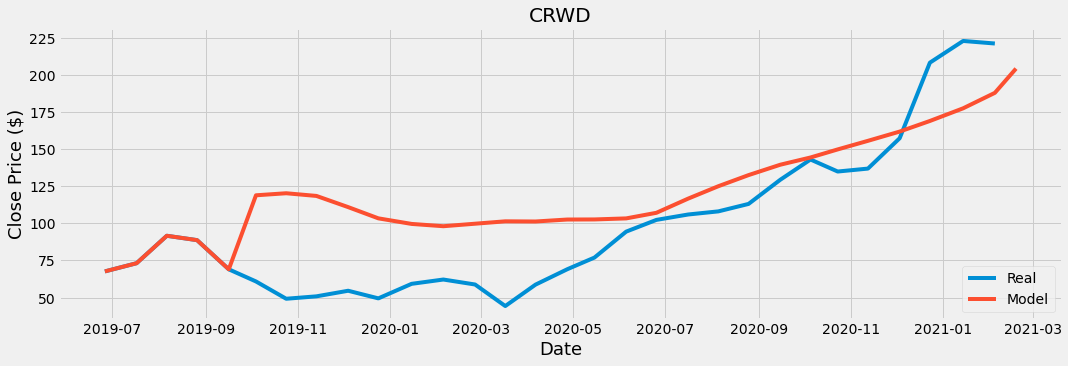

In [16]:
# Plot the data
for stock in stocks:
    model,df = models[stock],dfs[stock]
    yReal=np.reshape(np.array(model.closeSets[:]),[len(model.closeSets)]); step = math.ceil(model.groups/2)
    effDates = [df.index[ii+step] for ii in range(model.start,len(df.index),model.groups)]
    effDates.append(effDates[-1] + datetime.timedelta(days=groups))
    yReal = np.append(yReal, np.nan); 
    results = pd.DataFrame({'Close':yReal,'Model':model.predictions},index=effDates)
    plt.figure(figsize=(16,5)); plt.title(stock); plt.xlabel('Date',fontsize=18); plt.ylabel('Close Price ($)', fontsize=18); 
    plt.plot(results[:]); plt.legend(['Real','Model'],loc='lower right')
    plt.show()